In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

In [6]:
df = pd.read_csv(r'D:\cuoiki\laptopData.csv')
df.head(21)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71379
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47896
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96096
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114018
7,7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61736
8,8,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79654
9,9,Acer,Ultrabook,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41026


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [8]:
df.describe()

,Unnamed: 0,Price
count,1273,1273
mean,653,59956
std,376,37332
min,0,9271
25%,327,31915
50%,652,52161
75%,980,79333
max,1302,324955


In [9]:
for col in df.columns:
    missing_data = df[col].isna().sum()
    missing_percent = missing_data / len(df)*100
    print(f"Columns: {col} has {missing_percent}%")

Columns: Unnamed: 0 has 2.3023791250959325%
Columns: Company has 2.3023791250959325%
Columns: TypeName has 2.3023791250959325%
Columns: Inches has 2.3023791250959325%
Columns: ScreenResolution has 2.3023791250959325%
Columns: Cpu has 2.3023791250959325%
Columns: Ram has 2.3023791250959325%
Columns: Memory has 2.3023791250959325%
Columns: Gpu has 2.3023791250959325%
Columns: OpSys has 2.3023791250959325%
Columns: Weight has 2.3023791250959325%
Columns: Price has 2.3023791250959325%


In [12]:
import pandas as pd

# Đọc dữ liệu từ file CSV
file_path = r'D:\cuoiki\laptopData.csv'
df = pd.read_csv(file_path)
# Chọn các cột cần thiết: Cpu, Gpu, Memory, Price
df_selected = df[['Cpu', 'Gpu', 'Memory', 'Price']]
# Xóa các dòng có giá trị thiếu
df_cleaned = df.dropna()

# Đặt lại chỉ số sau khi xóa các dòng
df_cleaned.reset_index(drop=True, inplace=True)

# Xóa cột 'Unnamed' nếu nó là cột không cần thiết
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains('^Unnamed')]

# Lưu lại dữ liệu đã được xử lý vào một file CSV mới
output_file_path = r'D:\cuoiki\laptopData_cleaned.csv'
df_cleaned.to_csv(output_file_path, index=False)



# In ra thông báo
print(f"Đã lưu file sạch vào: {output_file_path}")


Đã lưu file sạch vào: D:\cuoiki\laptopData_cleaned.csv


In [13]:
df = pd.read_csv(r'D:\cuoiki\laptopData_cleaned.csv')
df.head(21)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71379
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47896
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96096
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114018
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61736
8,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79654
9,Acer,Ultrabook,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41026


In [14]:
# Kiểm tra số lượng giá trị thiếu trong từng cột
print(df.isnull().sum())

# Kiểm tra tổng số giá trị thiếu trong toàn bộ DataFrame
print(df.isnull().sum().sum())


Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64
0


In [15]:
# Kiểm tra các giá trị ngoài phạm vi hợp lệ (giá trị âm hoặc không hợp lệ)
invalid_price = df[df['Price'] < 0]

# In ra các dòng có giá trị không hợp lệ
print(invalid_price)


Empty DataFrame
Columns: [Company, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price]
Index: []


In [16]:
# Kiểm tra tất cả các giá trị duy nhất trong cột 'Cpu'
print(df['Cpu'].unique())

# Kiểm tra số lượng các giá trị duy nhất trong cột 'Cpu'
print(df['Cpu'].value_counts())


['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Core i5 7300HQ 2.5GHz' 'AMD E-Series E2-9000e 1.5GHz'
 'Intel Core i5 1.6GHz' 'Intel Core i7 8650U 1.9GHz'
 'Intel Atom x5-Z8300 1.44GHz' 'AMD E-Series E2-6110 1.5GHz'
 'AMD A6-Series 9220 2.5GHz' 'Intel Celeron Dual Core N3350 1.1GHz'
 'Intel Core i3 7130U 2.7GHz' 'Intel Core i7 7700HQ 2.8GHz'
 'Intel Core i5 2.0GHz' 'AMD Ryzen 1700 3GHz'
 'Intel Pentium Quad Core N4200 1.1GHz'
 'Intel Celeron Dual Core N3060 1.6GHz' 'Intel Core i5 1.3GHz'
 'AMD FX 9830P 3GHz' 'Intel Core i7 7560U 2.4GHz'
 'AMD E-Series 6110 1.5GHz' 'Intel Core i5 6200U 2.3GHz'
 'Intel Core M 6Y75 1.2GHz' 'Intel Core i5 7500U 

In [17]:
# Kiểm tra lại sự phân bổ của 'Cpu'
print(df['Cpu'].value_counts())

Cpu
Intel Core i5 7200U 2.5GHz       183
Intel Core i7 7700HQ 2.8GHz      142
Intel Core i7 7500U 2.7GHz       128
Intel Core i7 8550U 1.8GHz        72
Intel Core i5 8250U 1.6GHz        68
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64


In [18]:

import matplotlib.pyplot as plt


data= pd.read_csv(r'D:\cuoiki\laptopData_cleaned.csv')

df = pd.DataFrame(data)


# Tạo một cột mới với giá trị số cho Intel 
def classify_cpu(cpu_name):
    if 'Intel' in cpu_name:
        return 1  # Intel
    elif 'AMD' in cpu_name:
        return 2  # AMD
    else:
        return 0  # Other

df['Cpu_Value'] = df['Cpu'].apply(classify_cpu)

# Hiển thị DataFrame với cột mới
print(df)

     Company            TypeName Inches  \
0      Apple           Ultrabook   13.3   
1      Apple           Ultrabook   13.3   
2         HP            Notebook   15.6   
3      Apple           Ultrabook   15.4   
4      Apple           Ultrabook   13.3   
...      ...                 ...    ...   
1268  Lenovo  2 in 1 Convertible     14   
1269  Lenovo  2 in 1 Convertible   13.3   
1270  Lenovo            Notebook     14   
1271      HP            Notebook   15.6   
1272    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1268   IPS Panel Full HD / Touchscreen 1920x1080   
1269  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1270           

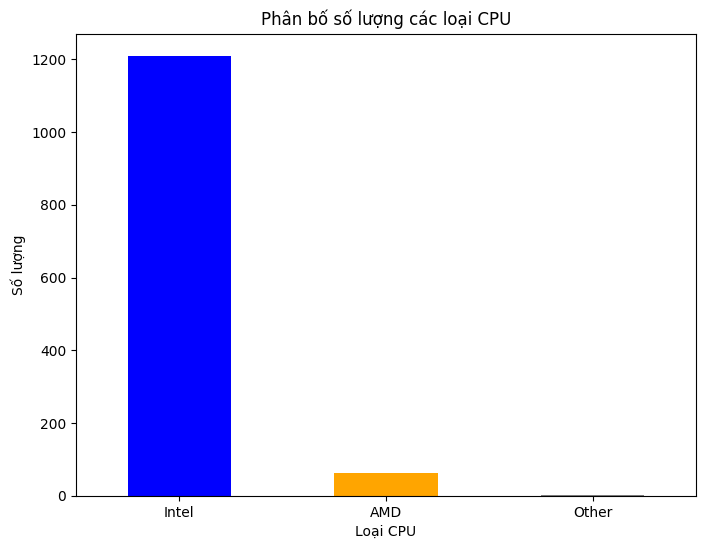

(np.float64(-1.0999998867392624),
 np.float64(1.0999997083480364),
 np.float64(-1.0999996802232763),
 np.float64(1.099999984772537))

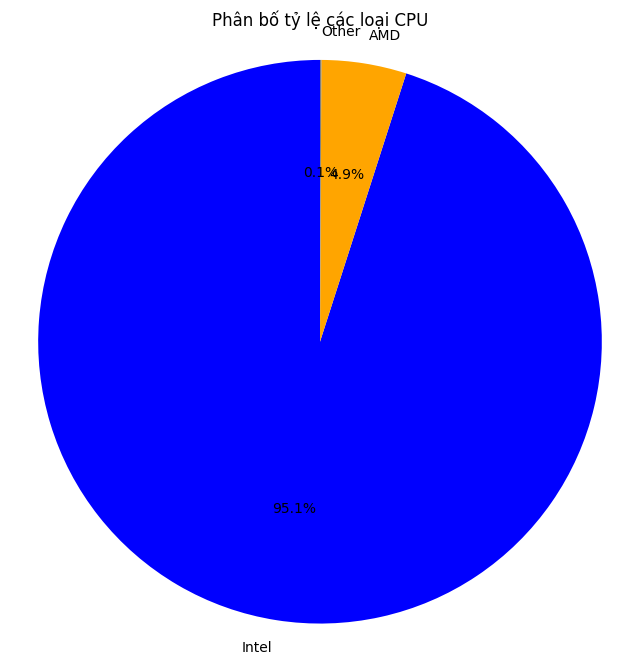

In [19]:
# Đếm số lượng mỗi loại CPU dựa trên 'Cpu_Value'
cpu_counts = df['Cpu_Value'].value_counts()

# Đặt nhãn cho các giá trị số (1: Intel, 2: AMD, 0: Other)
labels = {1: 'Intel', 2: 'AMD', 0: 'Other'}
cpu_counts.index = cpu_counts.index.map(labels)

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
cpu_counts.plot(kind='bar', color=['blue', 'orange', 'gray'])
plt.title('Phân bố số lượng các loại CPU')
plt.xlabel('Loại CPU')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.show()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(cpu_counts, labels=cpu_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'gray'])
plt.title('Phân bố tỷ lệ các loại CPU')
plt.axis('equal')  # Đảm bảo biểu đồ tròn đều

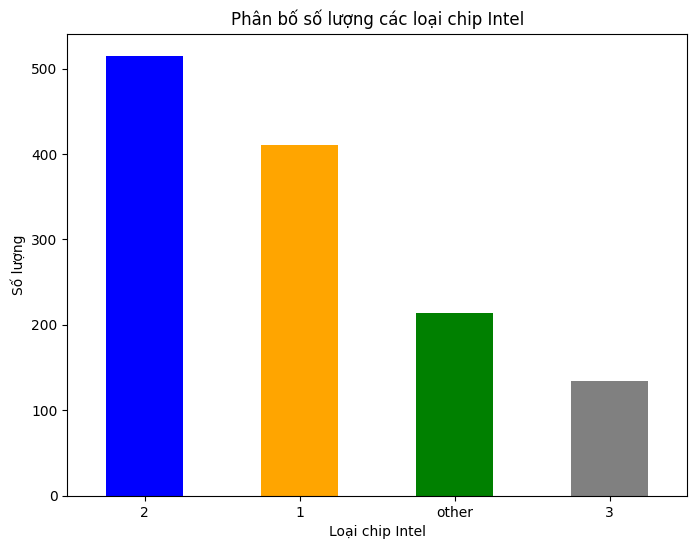

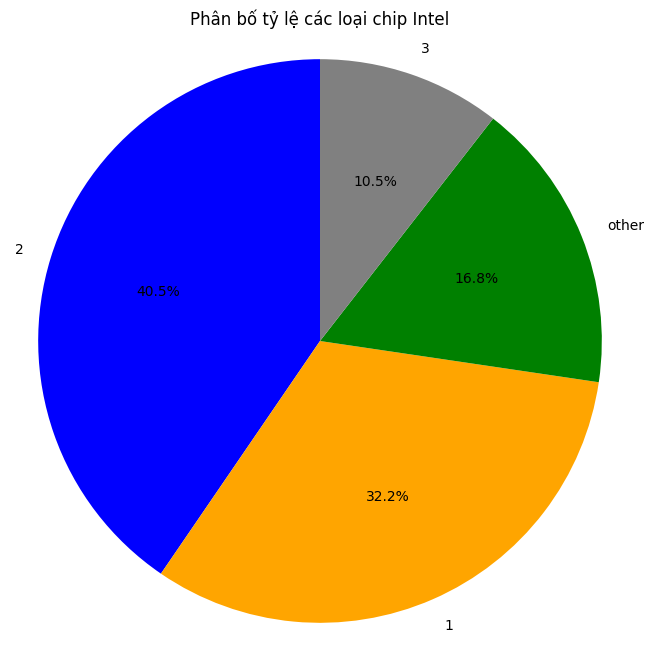

In [20]:
data= pd.read_csv(r'D:\cuoiki\laptopData_cleaned.csv')

df = pd.DataFrame(data)
# Tạo trường mới 'Cpu_Generation'
def map_cpu_generation(Cpu):
    if 'i5' in Cpu:
        return 1
    elif 'i7' in Cpu:
        return 2
    elif 'i3' in Cpu:
        return 3
    else:
        return 'other'

# Áp dụng hàm cho cột 'Cpu' và tạo cột mới
df['Cpu_Generation'] = df['Cpu'].apply(map_cpu_generation)

import matplotlib.pyplot as plt

# Đếm số lượng mỗi loại chip Intel
cpu_generation_counts = df['Cpu_Generation'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
cpu_generation_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'gray'])
plt.title('Phân bố số lượng các loại chip Intel')
plt.xlabel('Loại chip Intel')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.show()
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(cpu_generation_counts, labels=cpu_generation_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green', 'gray'])
plt.title('Phân bố tỷ lệ các loại chip Intel')
plt.axis('equal')  # Đảm bảo biểu đồ tròn đều
plt.show()



In [21]:
df['Memory'] = df['Memory'].str.lower().str.strip()
print(df)


     Company            TypeName Inches  \
0      Apple           Ultrabook   13.3   
1      Apple           Ultrabook   13.3   
2         HP            Notebook   15.6   
3      Apple           Ultrabook   15.4   
4      Apple           Ultrabook   13.3   
...      ...                 ...    ...   
1268  Lenovo  2 in 1 Convertible     14   
1269  Lenovo  2 in 1 Convertible   13.3   
1270  Lenovo            Notebook     14   
1271      HP            Notebook   15.6   
1272    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1268   IPS Panel Full HD / Touchscreen 1920x1080   
1269  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1270           

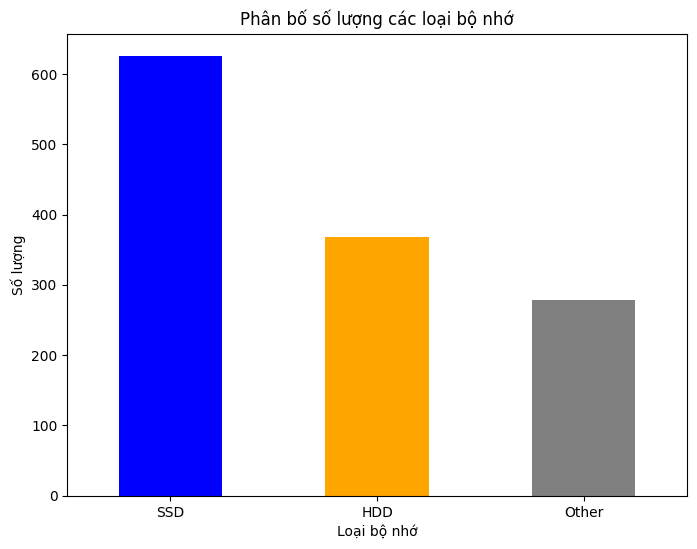

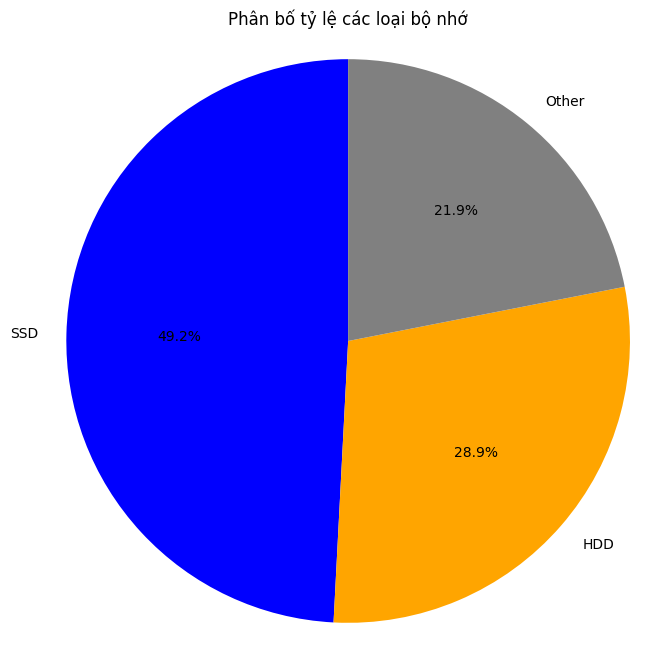

In [22]:


import matplotlib.pyplot as plt

data= pd.read_csv(r'D:\cuoiki\laptopData_cleaned.csv')

df = pd.DataFrame(data)

# Chuẩn hóa dữ liệu
df['Memory'] = df['Memory'].str.lower().str.strip()

# Hàm phân loại Memory
def classify_memory(memory):
    if 'ssd' in memory and 'hdd' not in memory:
        return 1  # SSD
    elif 'hdd' in memory and 'ssd' not in memory:
        return 2  # HDD
    else:
        return 0  # Other (Cả SSD và HDD hoặc loại khác)

# Tạo cột mới 'Memory_Type'
df['Memory_Type'] = df['Memory'].apply(classify_memory)

# Đếm số lượng mỗi loại Memory
memory_counts = df['Memory_Type'].value_counts()

# Gắn nhãn cho các giá trị số
labels = {1: 'SSD', 2: 'HDD', 0: 'Other'}
memory_counts.index = memory_counts.index.map(labels)

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
memory_counts.plot(kind='bar', color=['blue', 'orange', 'gray'])
plt.title('Phân bố số lượng các loại bộ nhớ')
plt.xlabel('Loại bộ nhớ')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.show()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(memory_counts, labels=memory_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'gray'])
plt.title('Phân bố tỷ lệ các loại bộ nhớ')
plt.axis('equal')  # Đảm bảo biểu đồ tròn đều
plt.show()



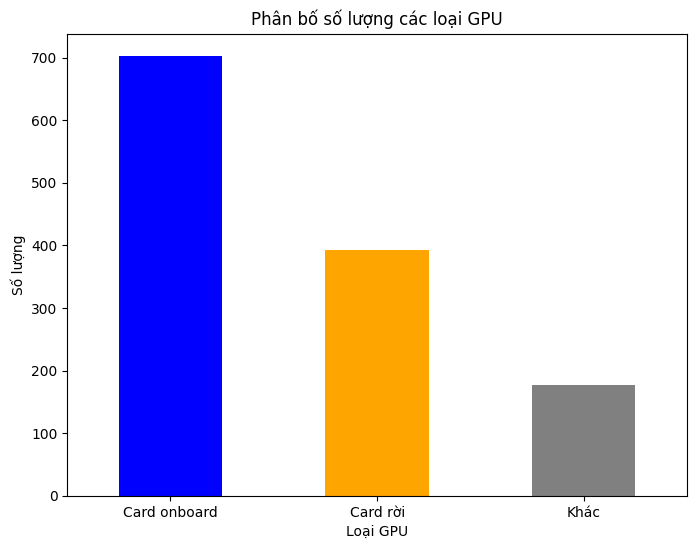

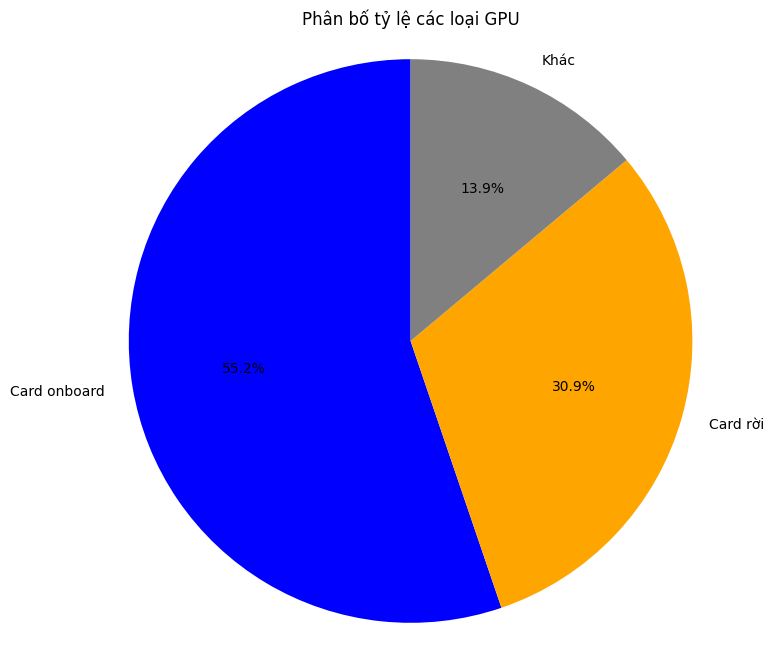

In [23]:


data= pd.read_csv(r'D:\cuoiki\laptopData_cleaned.csv')
df = pd.DataFrame(data)

# Chuẩn hóa dữ liệu
df['Gpu'] = df['Gpu'].str.lower().str.strip()

# Hàm phân loại GPU thành 'Card onboard' hoặc 'Card rời'
def classify_gpu_type(gpu):
    if 'intel' in gpu and 'graphics' in gpu:
        return 'Card onboard'  # GPU tích hợp
    elif 'nvidia' in gpu:
        return 'Card rời'  # GPU rời của NVIDIA
    else:
        return 'Khác'  # Các loại khác không thuộc hai loại trên

# Tạo cột mới 'Gpu_Category'
df['Gpu_Category'] = df['Gpu'].apply(classify_gpu_type)

import matplotlib.pyplot as plt

# Đếm số lượng mỗi loại GPU
gpu_counts = df['Gpu_Category'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
gpu_counts.plot(kind='bar', color=['blue', 'orange', 'gray'])
plt.title('Phân bố số lượng các loại GPU')
plt.xlabel('Loại GPU')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.show()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(gpu_counts, labels=gpu_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'gray'])
plt.title('Phân bố tỷ lệ các loại GPU')
plt.axis('equal')  # Đảm bảo biểu đồ tròn đều
plt.show()



Lower Bound: 0, Upper Bound: 45249757.82712
False
   Price_VND
0 21,466,425
1 14,404,100
2  9,213,471
3 40,658,645
4 28,899,853


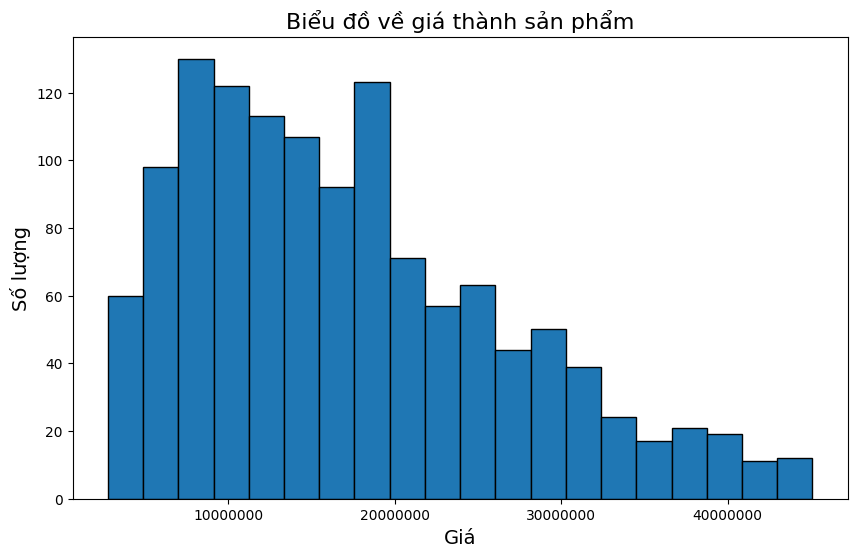

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tỷ giá cố định từ INR sang VND (ví dụ: 1 INR = 300.74 VND)
rate_inr_to_vnd = 300.74

# Đọc dữ liệu từ CSV
data = pd.read_csv(r'D:\cuoiki\laptopData_cleaned.csv')

# Chuyển đổi từ INR sang VND
data['Price_VND'] = data['Price'] * rate_inr_to_vnd

# Đặt tùy chọn hiển thị để số liệu không dùng dạng khoa học
pd.set_option('display.float_format', '{:,.0f}'.format)

# Tính toán IQR (Interquartile Range)
Q1 = data['Price_VND'].quantile(0.25)
Q3 = data['Price_VND'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
# Đảm bảo giới hạn dưới không âm
lower_bound = max(0, lower_bound)  # Nếu lower_bound âm thì thay bằng 0
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Thay thế các giá trị ngoài IQR bằng NaN
data.loc[(data['Price_VND'] < lower_bound) | (data['Price_VND'] > upper_bound), 'Price_VND'] = np.nan

# Lấy top 5 giá trị có tần suất cao nhất
top5_Price_VND = data['Price_VND'].value_counts().nlargest(5)
prob = top5_Price_VND / top5_Price_VND.sum()  # Tính xác suất của từng giá trị

# Generate giá trị theo phân phối của top 5 giá trị
data['Price_VND'] = data['Price_VND'].apply(lambda x: np.random.choice(top5_Price_VND.index, p=prob) if pd.isnull(x) else x)

# Kiểm tra xem còn giá trị NaN nào không
print(data['Price_VND'].isnull().any())  # Mọi thứ đều ổn nếu không còn NaN

# In ra dữ liệu đã chuyển đổi
print(data[['Price_VND']].head())

# Vẽ biểu đồ histogram cho cột 'Price_VND'
plt.figure(figsize=(10, 6))  # Thiết lập kích thước biểu đồ
plt.hist(data['Price_VND'], bins=20, edgecolor='black')  # Sử dụng histogram đơn giản
plt.title('Biểu đồ về giá thành sản phẩm', fontsize=16)  # Tiêu đề biểu đồ
plt.xlabel('Giá', fontsize=14)  # Nhãn trục X
plt.ylabel('Số lượng', fontsize=14)  # Nhãn trục Y
plt.ticklabel_format(style='plain', axis='both')
plt.show()



In [100]:
client=MongoClient('mongodb://localhost:27017/')
db=client['laptoData']
collection=db['khiem']
data_dict=df.to_dict('records')
collection.insert_many(data_dict)
print('Da luu du lieu vao MongoDB')


Da luu du lieu vao MongoDB
